# DAT 19: Homework 3 Assignment - Clustering with K-means

## Instructions

In this homework assignment, we will get practice with our first unsupervised learning technique, clustering. We will analyze wholesale purchases by 440 clients of a wholesale distributor. 

Please do all your analysis to answer the questions below in this Jupyter notebook. Show your work.

**Please submit your completed notebook by 6:30PM on Wednesday, January 20.**

## About the Data

The [Wholesale Customers dataset](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers) and a description of the data is available from the UCI ML Repository.

## Homework Assignment

**1) Load the dataset. Check for missing values, perform any normalization that you think is necessary (remember that K-means uses the Euclidean Distance function).**

In [21]:
#your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

data = pd.read_csv('wholesale_customers.csv', header=0)
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [22]:
#check for missing values, looks like they're all accounted for
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 30.9 KB


**2.1) Look at the dataset. There are both continuous and categorical variables. What are the categorical variables? From a business perspective, what do those categorical variables represent?**

The categorical variables in this dataset are "Channel" and "Region." "Channel" represents the type of customer as a numerical value indicating that the customer is either a hotel, restaurant, or cafe. "Region" represents the location of the customer as a numerical value.

**2.2) What results might we expect from the k-means clustering if we were to run it on the dataset as-is? Explain your thinking in words.**

K-Means probably would not work very well for this data, since it contains categorical data as well as continuous. It doesn't make sense to calculate mean using categorical data since categorical data doesn't indicate an actual measurement but membership to a class. You can't calculate the mean of "being a hotel". 

**3) Using ONLY the continuous features in the dataset, apply the K-means algorithm to find clusters in the data.**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont_data = data.drop(['Channel','Region'], axis=1)
X = scaler.fit_transform(cont_data)
km = KMeans(3)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
centers = km.cluster_centers_
centers

array([[ 2.66923448,  0.91946292,  0.30839434,  3.11431706, -0.29772452,
         2.49860873],
       [-0.06654039, -0.2339313 , -0.26236673, -0.09236564, -0.24476763,
        -0.11316471],
       [-0.34000201,  1.75743749,  2.2232134 , -0.2658391 ,  2.2783047 ,
         0.13371597]])

**4.1) Plot the Silhouette Coefficient as a function of the number of clusters (remember that you set the number of clusters as an input to K-means).**

In [25]:
from sklearn.metrics import silhouette_score

labels = km.labels_

silhouette_score(X,labels,metric='euclidean')

0.54286364787014241

**4.2) What is the ideal value for k, the number of clusters? Why?**

Three looks like the ideal value for K in this dataset. This plot indicates that the silhouette coefficient is highest when k=3. 

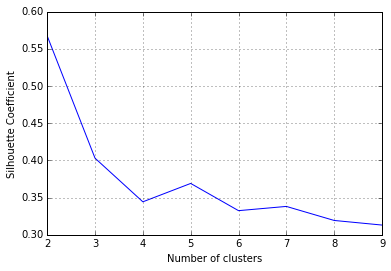

In [26]:
my_ks = range(2,10)
silhouettes = []
for k in my_ks:
    temp_kn = KMeans(k)
    temp_kn.fit(X)
    temp_labels = temp_kn.labels_
    new_score = silhouette_score(X,temp_labels,metric='euclidean')
    silhouettes.append(new_score)
silhouettes

plt.plot(my_ks, silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

**4.3) How does your answer for 3.2 compare with your thoughts from 2.2 above?**

There isn't a 3.2 so I'm not sure which question this is referring to.

### Extra Credit Questions
**The following questions are strongly encouraged, but not required for this homework assignment.**

**5) Read the scikit-learn user guide section about [clustering](http://scikit-learn.org/stable/modules/clustering.html). Pay particular attention to the section about [assumptions](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#example-cluster-plot-kmeans-assumptions-py).**

**6) PCA & PLOTTING:** <br> With six continuous features, plotting our clusters in two dimensions will be challenging. We can use [Principal Components Analysis](http://scikit-learn.org/stable/modules/decomposition.html#pca) and then plot only the "top two" dimensions. More technically, these are the dimensions that capture most of the variance in our data set. For this extra credit question, read about [PCA in the sklearn.decomposition module](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), apply it to the wholesale dataset, repeat the k-means clustering, and plot your results using only the top two principal components.

In [27]:
#your code here, should you choose to attempt it